
# CGC Bit‑Plane Visualizer

Upload or specify an image and this notebook will show you each of the **24 bit‑planes** of its RGB channels, **after converting every pixel to Canonical Gray Code (CGC)**.

> A Canonical Gray Code value for an 8‑bit number `n` is simply `n ^ (n >> 1)`.  
> Working in CGC space is often used in watermarking and data‑hiding literature because neighbouring values differ by only one bit.


In [7]:

%matplotlib inline
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (18, 9)


In [8]:

def load_image(path_or_pil):
    """Return a PIL.Image converted to RGB."""
    if isinstance(path_or_pil, Image.Image):
        return path_or_pil.convert('RGB')
    return Image.open(Path(path_or_pil)).convert('RGB')


In [9]:

def show_cgc_bit_planes(image):
    """Visualise 24 bit‑planes (8 per channel) after CGC conversion."""
    img = load_image(image)
    
    # Convert entire image array to CGC: gray = n ^ (n >> 1)
    arr = np.array(img).astype(np.uint8)
    arr = arr ^ (arr >> 1)
    
    fig, axes = plt.subplots(3, 8, figsize=(20, 9))
    channels = ['Rot', 'Grün', 'Blau']
    
    for ch in range(3):
        channel = arr[..., ch]
        for bit in range(8):
            mask = 1 << bit
            plane = ((channel & mask) >> bit) * 255  # 0/255 image
            ax = axes[ch, bit]
            ax.imshow(plane, cmap='gray', vmin=0, vmax=255)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f"{channels[ch]} g{bit+1} (bit {bit})")  # g1..g8
    plt.tight_layout()
    plt.show()


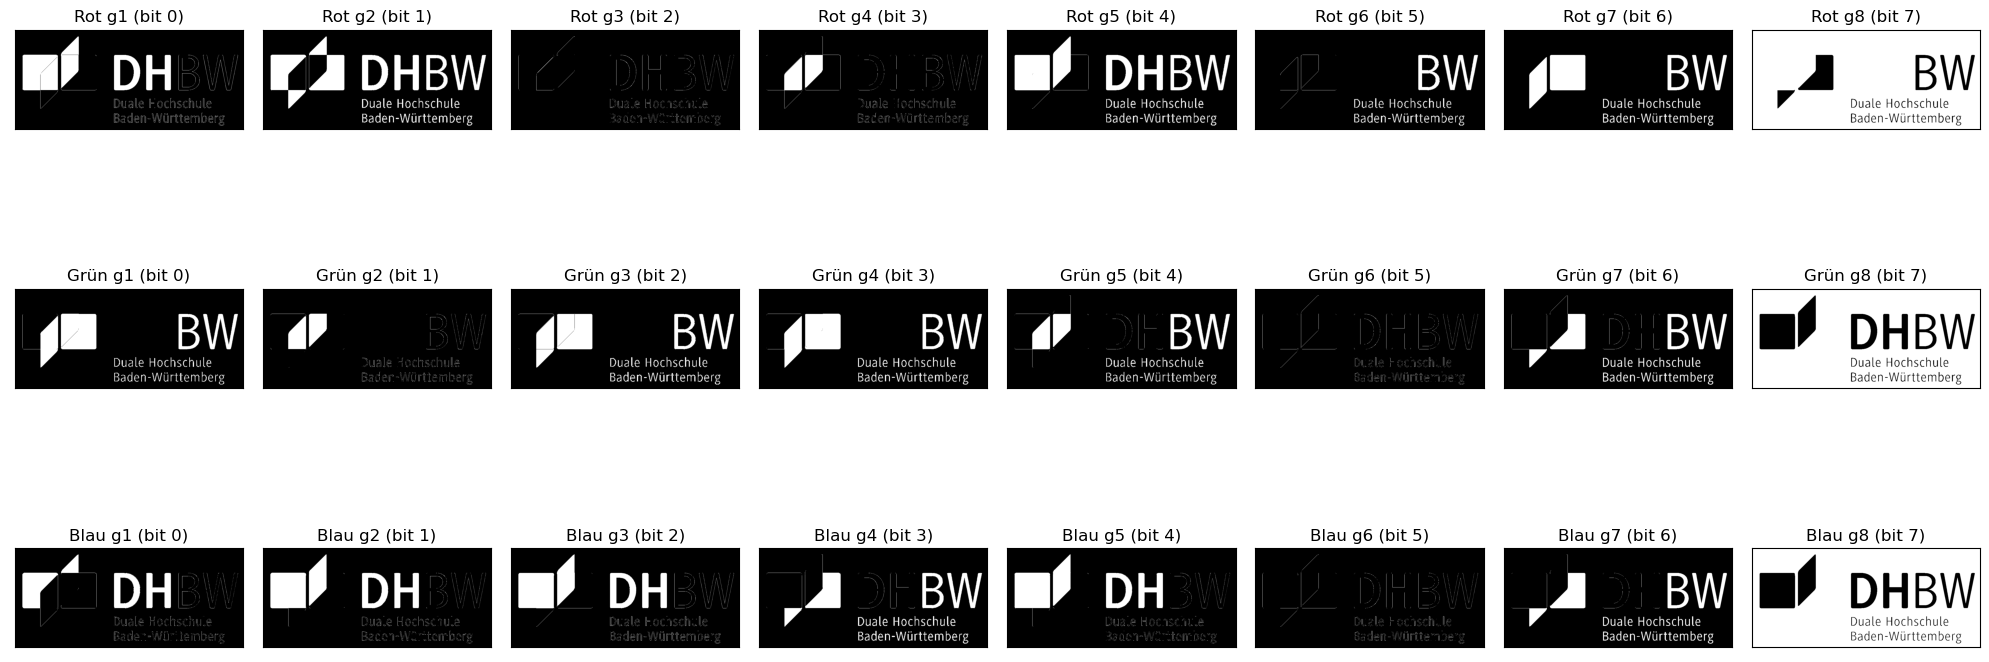

In [10]:
image_path = "examples/dhbw_logo.png"  # ← change me!
show_cgc_bit_planes(image_path)


## Quick Start

```python
image_path = "your_image_here.png"  # ← change me!
show_cgc_bit_planes(image_path)
```
